# GESTION DE PORTEFEUILLE - Assignement 1


#### Hugo Lamarre - HEC Montréal
#### Hiver 2023

### Etudiants

CARON Sébastien  - 11271997 

LEPEYTRE Vincent - 11237013

NONGUIERMA Harold  -

TOURÉ Ousmane  -

In [90]:
import importlib
 
from Functions import *



#### Data Importation

In [88]:
Data = Load_ind_data()["Data"]
Data = Data[Data.index >= '2000-01'] # We keep only the data after 2000

Data_select = Data[['Meals','Guns','Hshld','Oil','Txtls']]


Industrie_selected = Data_select.columns


Data



c:\Users\Sébastien\Desktop\TP1\Functions.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x,'%Y%m')


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
2000-01-01,-4.50,-10.33,19.70,-2.28,-8.62,-13.81,3.76,-0.62,-6.51,-11.50,...,-13.15,-9.56,7.59,-14.51,-7.39,-2.55,-7.27,-0.69,-6.80,0.04
2000-02-01,8.16,-7.08,-8.28,-11.64,-4.01,0.42,-2.31,-0.61,-11.57,-12.73,...,-12.60,-5.35,1.76,-3.93,-12.03,-11.30,-12.76,2.27,6.55,-2.15
2000-03-01,4.26,10.76,-0.29,0.13,5.11,7.69,10.70,13.12,-14.26,25.38,...,12.43,12.87,7.03,14.38,15.98,15.04,22.87,3.28,14.71,-2.00
2000-04-01,-7.61,-4.08,-0.80,3.68,3.79,0.27,2.35,-7.54,4.29,4.30,...,-8.21,3.48,-2.60,-5.60,3.82,-2.85,-0.40,-3.71,-11.14,9.24
2000-05-01,-2.47,18.06,-7.24,11.87,19.51,1.15,1.26,-6.34,2.79,-5.04,...,-2.34,-3.63,1.30,-3.04,-4.21,7.95,7.31,-2.71,-6.81,10.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,6.38,3.68,3.28,5.49,0.56,5.63,17.04,12.08,0.76,11.86,...,7.09,9.33,9.08,16.33,11.89,8.54,3.15,14.10,10.44,10.01
2022-08-01,5.23,-0.46,-4.40,-1.87,-0.12,-5.77,-2.26,-5.00,-2.16,-6.01,...,-9.11,-1.46,-1.60,-3.46,-1.47,-3.41,-0.84,-6.12,-1.02,-4.03
2022-09-01,-7.03,-7.65,-8.14,-5.21,-10.55,-15.43,-4.10,-13.38,-10.60,-17.36,...,-13.85,-14.24,-9.46,-7.67,-6.26,-9.21,-4.45,-12.89,-8.47,-5.96
2022-10-01,13.79,11.12,7.13,9.49,12.08,5.48,14.98,8.82,5.68,10.72,...,5.60,6.68,13.65,1.94,10.26,13.54,12.83,6.82,11.34,10.48


In [81]:
Expected_Risk_free = Load_rf()/100


## Selection of Industry

<AxesSubplot:title={'center':'Industry Sharpe Ratio'}>

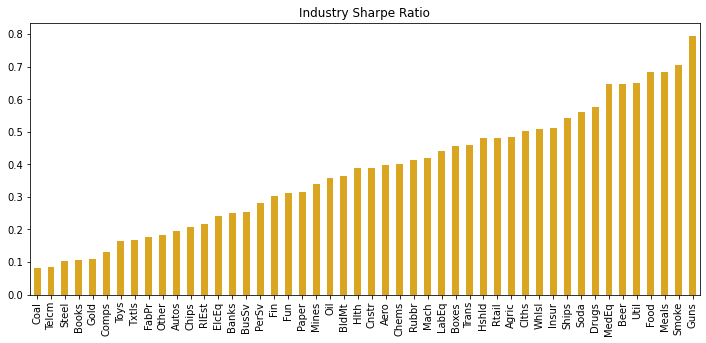

In [4]:
ret_ind = annualize_rets(Data/100, 12) 

cov = Data.cov()

ann_vol = annualize_vol(Data/100, 12)


sharpe_ratio(Data/100, Expected_Risk_free/100, 12).sort_values().plot.bar(title="Industry Sharpe Ratio", color = "goldenrod", figsize = (12,5))


([10.378870137054005], [0.03960878138662349])

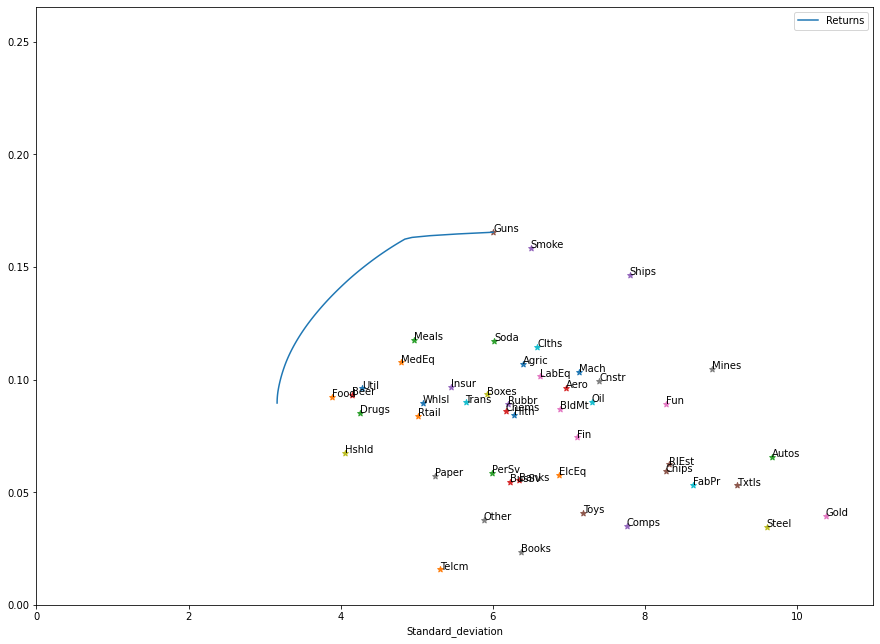

In [5]:
ret_ind = annualize_rets(Data/100, 12)

Efficient_frontiere_result = Ptf_target_optimization(ret_ind, cov, 100, bounds = (0, 1))


plt=Efficient_frontiere_result['Efficient_frontiere']['Returns'].plot(kind='line',figsize=(15,11),
                                                                    xlim = [0,
                                                                              max(Efficient_frontiere_result['Efficient_frontiere'].index)+5], 
                                                                    ylim = [0,
                                                                            max(Efficient_frontiere_result['Efficient_frontiere']['Returns'])+0.1])


for i in ret_ind.index :
    plt.scatter([np.sqrt(cov[i][i])],[ret_ind[i]], marker='*')
    plt.annotate(i,(np.sqrt(cov[i][i]),ret_ind[i]))
    
                 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.plot()
[np.sqrt(cov["Gold"]["Gold"])],[ret_ind["Gold"]]

#### Look at the top 10 more weighted industry for the min_variance (Without short sale)

In [6]:
w = Min_var_ptf(ret_ind, cov, bounds = (0,1))["Min_var_weigth"]
df = pd.DataFrame(round(w, 2).values, columns = w.columns).transpose()
df.columns = ["Weight"]
result1 = df.sort_values(by="Weight", ascending = False)[:10].index
result1

Index(['Food', 'Util', 'Drugs', 'Hshld', 'Beer', 'Rtail', 'Agric', 'Guns',
       'Gold', 'Soda'],
      dtype='object')

#### Look at the top 5 more weighted industry for the min_variance (with short sale)

In [7]:
w = Min_var_ptf(ret_ind, cov, bounds = (-2,2))["Min_var_weigth"]
df = pd.DataFrame(abs(round(w, 2).values), columns = w.columns).transpose()
df.columns = ["Weight"]
result2 = df.sort_values(by="Weight", ascending = False)[:5].index
result2

Index(['Food', 'Util', 'Chems', 'Drugs', 'Rtail'], dtype='object')

#### Let's look at the correlation matrix between those important industry

##### We will like to be the most diversify as possible

In [8]:
tmp = result1.append(result2)
res_ind = [] 
[res_ind.append(x) for x in tmp if x not in res_ind] 
len(res_ind)


11

       Food  Util  Drugs  Hshld  Beer  Rtail  Agric  Guns  Gold  Soda  Chems
Food   1.00  0.48   0.48   0.62  0.66   0.51   0.34  0.40  0.12  0.43   0.54
Util   0.48  1.00   0.41   0.45  0.49   0.34   0.35  0.31  0.21  0.35   0.48
Drugs  0.48  0.41   1.00   0.52  0.50   0.46   0.31  0.32  0.11  0.32   0.51
Hshld  0.62  0.45   0.52   1.00  0.66   0.49   0.27  0.40  0.13  0.47   0.56
Beer   0.66  0.49   0.50   0.66  1.00   0.41   0.26  0.38  0.12  0.54   0.45
Rtail  0.51  0.34   0.46   0.49  0.41   1.00   0.39  0.36  0.07  0.36   0.68
Agric  0.34  0.35   0.31   0.27  0.26   0.39   1.00  0.24  0.13  0.19   0.57
Guns   0.40  0.31   0.32   0.40  0.38   0.36   0.24  1.00  0.13  0.33   0.43
Gold   0.12  0.21   0.11   0.13  0.12   0.07   0.13  0.13  1.00  0.05   0.20
Soda   0.43  0.35   0.32   0.47  0.54   0.36   0.19  0.33  0.05  1.00   0.44
Chems  0.54  0.48   0.51   0.56  0.45   0.68   0.57  0.43  0.20  0.44   1.00


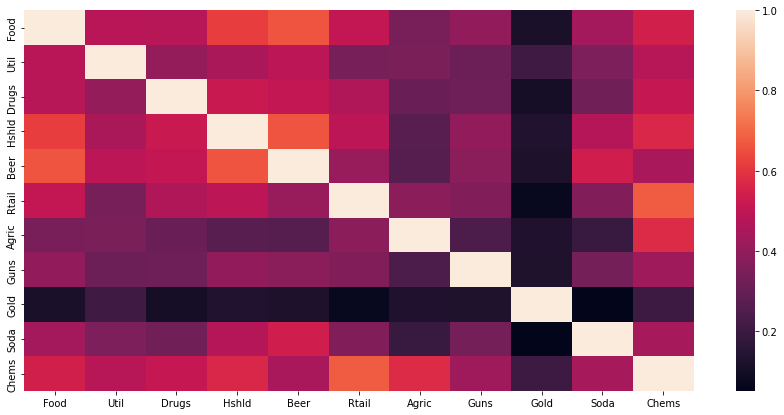

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
data_ind = Data[res_ind]
cormat = data_ind.corr()
print(round(cormat,2))

plt.figure(figsize=(15, 7))

sns.heatmap(cormat);

plt.show()


We are left with 11 industries, let's take a look at the correlation matrix and there efficient frontier

[]

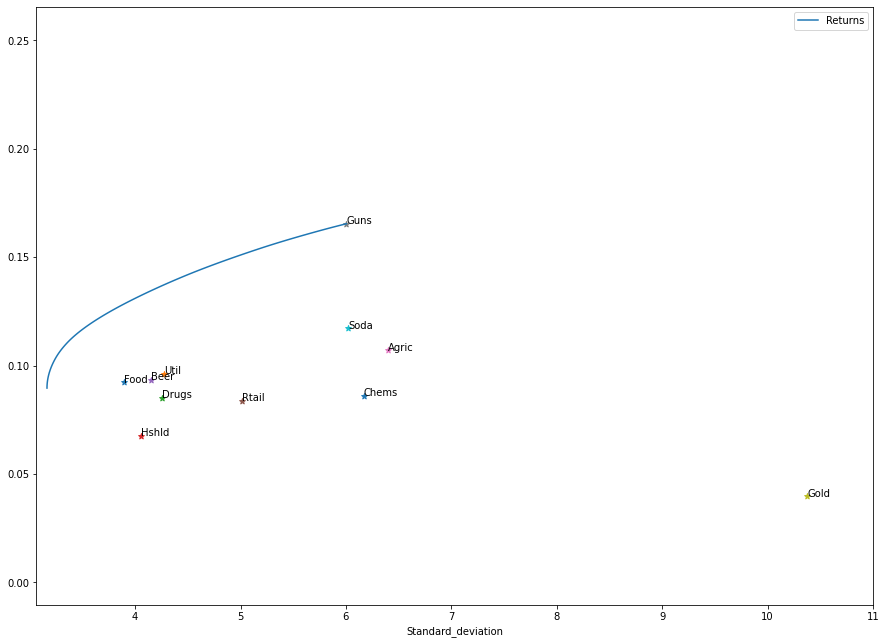

In [24]:
ret_ind = annualize_rets(data_ind/100, 12)#Some industry mark -1, because of data trash I think

cov = data_ind.cov()

Efficient_frontiere_result = Ptf_target_optimization(ret_ind, cov, 100, bounds = (0, 1))

plt=Efficient_frontiere_result['Efficient_frontiere']['Returns'].plot(kind='line',figsize=(15,11),
                                                                    xlim = [min(Efficient_frontiere_result['Efficient_frontiere'].index) - 0.1,
                                                                              max(Efficient_frontiere_result['Efficient_frontiere'].index)+5], 
                                                                    ylim = [min(Efficient_frontiere_result['Efficient_frontiere']['Returns'])-0.1,
                                                                            max(Efficient_frontiere_result['Efficient_frontiere']['Returns'])+0.1])


for i in ret_ind.index :
    plt.scatter([np.sqrt(cov[i][i])],[ret_ind[i]], marker='*')
    plt.annotate(i,(np.sqrt(cov[i][i]),ret_ind[i]))
                 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.plot()

<AxesSubplot:xlabel='Volatility'>

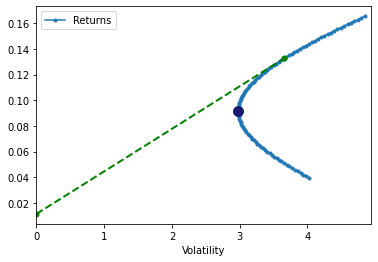

In [26]:

## Je test une fonction de Fonctions_seb tiré d'un cours sur coursera
plot_ef(100, ret_ind, cov, style=".-", show_cml=True, riskfree_rate=Expected_Risk_free / 100, show_ew = False, show_gmv= True)

On pourrait générer des combinaisons des 11 industries et voir le ratio qui maximise la courbe efficiente

J'ai pris les 5 industries ayant pas trop de corréalations + portefeuille le + proche de la courbe efficiente

["Agric", "Guns", ""Food", "Soda", "Util"]

## Question 1
### (a) Graph the mean-variance frontier without risk-free asset of the selected 5 industry portfolios.
Display each industry portfolio in the chart.

#### Estimation of the covariance-matrix and expected return   :

In [82]:
# Expected return : other possible approach simple machine learning with technical indicator 
E_return = annualize_rets(Data_select/100, 12)  #On a besoin des rendement annualisées comme le risk free rate est annualisé 
E_cov = Data_select.cov() # Just for test
Nbr_PTF = 100

##### Determination of the optimal  portfolio  for a given return (with Short Sell) :

In [83]:
Efficient_frontiere_result = Ptf_target_optimization(E_return, E_cov, Nbr_PTF, bounds = (-2, 2))


#### Result presentation (Plotting) : 

[]

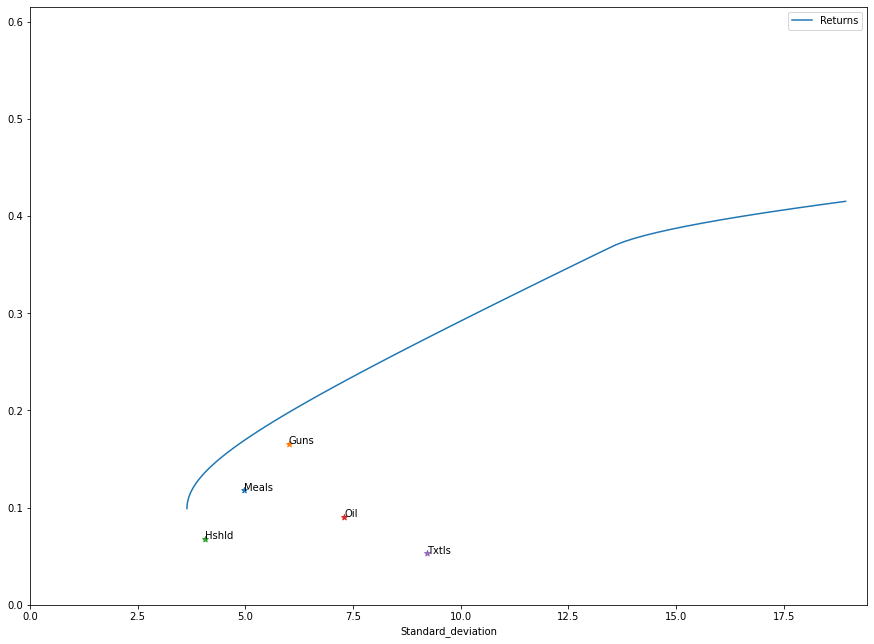

In [84]:

plt = Efficient_frontiere_result['Efficient_frontiere']['Returns'].plot(kind='line',figsize=(15,11), xlim = [0, max(Efficient_frontiere_result['Efficient_frontiere'].index)+0.5], 
     ylim = [0, max(Efficient_frontiere_result['Efficient_frontiere']['Returns'])+0.2])


for i in E_return.index :
    plt.scatter([np.sqrt(E_cov[i][i])],[E_return[i]], marker='*')
    plt.annotate(i,(np.sqrt(E_cov[i][i]),E_return[i]))
                 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.plot()


### (b) Graph the mean-variance frontier with risk-free asset of the selected 5 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.



#### Determination of the maximum return portfolio (With Short Sell) :

In [85]:
Efficient_frontiere_result_WS = Ptf_target_optimization_W_Rf(E_return, E_cov, Expected_Risk_free, Nbr_PTF, bounds = (-2,2)) #bounds (-2,2) --> short sale available

#### Result presentation : 

[]

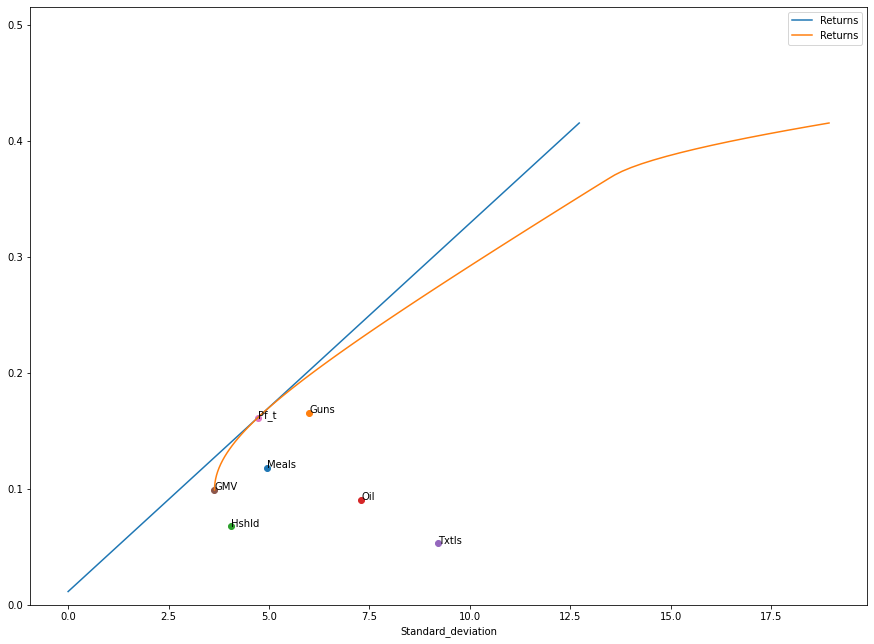

In [16]:
plt=Efficient_frontiere_result_WS['Efficient_frontiere']['Returns'].plot(kind='line',figsize=(15,11), 
     ylim = [0, max(Efficient_frontiere_result_WS['Efficient_frontiere']['Returns'])+0.1])
for i in E_return.index :
    plt.scatter([np.sqrt(E_cov[i][i])],[E_return[i]], marker='o')
    plt.annotate(i,(np.sqrt(E_cov[i][i]),E_return[i]))
    
    
    
    
Efficient_frontiere_result['Efficient_frontiere']['Returns'].plot(kind='line')
    
    
#Plot GMV
w = gmv(E_cov)
y = portfolio_return(w, E_return)
x =  portfolio_vol(w, E_cov)   
plt.scatter(x,y, marker="o")
plt.annotate("GMV",(x,  y))

#Plot Portfolio Tangente

w = msr(Expected_Risk_free, E_return, E_cov)
y = portfolio_return(w, E_return)
x = portfolio_vol(w, E_cov)
plt.scatter(x,y, marker="o")
plt.annotate("Pf_t",(x,  y))

         
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.plot()

In [89]:





plot_ef(E_return, E_cov, Expected_Risk_free, Nbr_PTF, show_cml=False, show_gmv=True, bounds = (-2,2))


TypeError: plot_ef() got an unexpected keyword argument 'bounds'

In [ ]:
Efficient_frontiere_result['Efficient_frontiere']['Returns'] #Without Risk-free Assets

#Start by plotting result of efficient frontier without rf
plt = Efficient_frontiere_result['Efficient_frontiere']['Returns'].plot(kind='line',figsize=(15,11), 
                                                                    xlim = [0, max(Efficient_frontiere_result['Efficient_frontiere'].index)+0.5], 
                                                                    ylim = [0, max(Efficient_frontiere_result['Efficient_frontiere']['Returns'])+0.2])

#Plot efficient frontier with rf
Efficient_frontiere_result_WS['Efficient_frontiere']['Returns'].plot(kind='line')

#Plot the ret/risk of every asset
for i in E_return.index :
    plt.scatter([np.sqrt(E_cov[i][i])],[E_return[i]], marker='o')
    plt.annotate(i,(np.sqrt(E_cov[i][i]),E_return[i]))


#Plot GMV
w = gmv(E_cov)
y = portfolio_return(w, E_return)
x =  portfolio_vol(w, E_cov)   
plt.scatter(x,y, marker="o")
plt.annotate("GMV",(x,  y))

#Plot Portfolio Tangente

w = msr(Expected_Risk_free, E_return, E_cov)
y = portfolio_return(w, E_return)
x = portfolio_vol(w, E_cov)
plt.scatter(x,y, marker="o")
plt.annotate("Pf_t",(x,  y))

In [68]:

w = gmv(E_cov)
print(portfolio_return(w, E_return))
portfolio_vol(w, E_cov)



w = msr(Expected_Risk_free, E_return, E_cov)
print(portfolio_return(w, E_return))
portfolio_vol(w, E_cov)


0.09906025050583776
0.16118748012188175


4.718684409636506

#### Explanations: 

### (c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset
À élaborer (Ne fonctionne pas)

In [323]:
Efficient_frontiere_result_WS["Efficient_frontiere_weigth"]
z = np.array(E_return).transpose()
cov_inv =  np.linalg.inv(E_cov)
I = np.ones(len(E_cov))
A = np.dot(np.dot(I, cov_inv), I.transpose())
B = np.dot(np.dot(z, cov_inv), I.transpose())
gamma = 1 / (B - A*Expected_Risk_free)

weight = np.dot(cov_inv, (z - Expected_Risk_free)) / gamma

In [16]:
msr(Expected_Risk_free, E_return, E_cov)

array([0.00000000e+00, 1.00000000e+00, 3.36352492e-17, 0.00000000e+00,
       0.00000000e+00])

### (d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.



[]

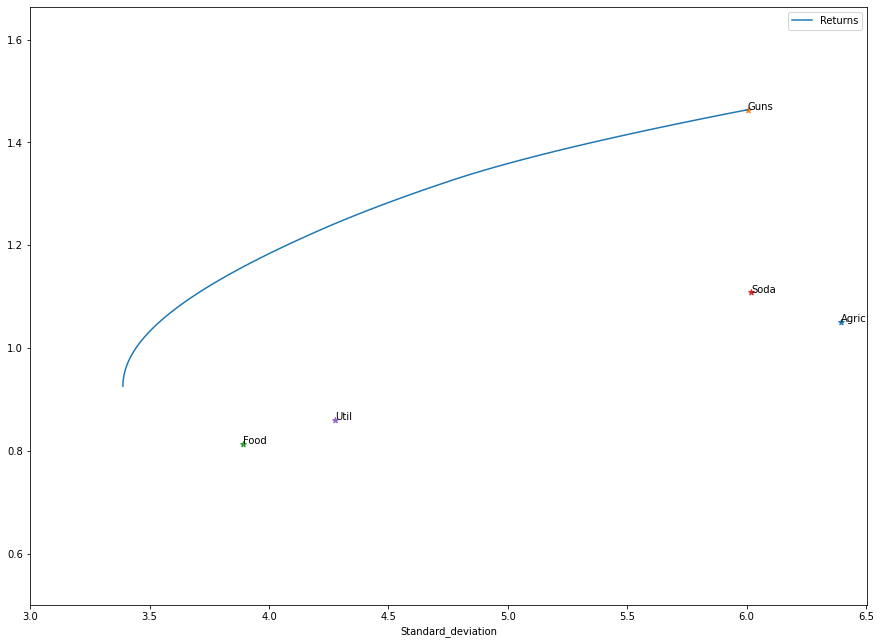

In [330]:
Efficient_frontiere_result = Ptf_target_optimization(E_return, E_cov, Nbr_PTF, bounds = (0, 1))

plt = Efficient_frontiere_result['Efficient_frontiere']['Returns'].plot(kind='line',figsize=(15,11), xlim = [3, max(Efficient_frontiere_result['Efficient_frontiere'].index)+0.5], 
     ylim = [0.5, max(Efficient_frontiere_result['Efficient_frontiere']['Returns'])+0.2])


for i in E_return.index :
    plt.scatter([np.sqrt(E_cov[i][i])],[E_return[i]], marker='*')
    plt.annotate(i,(np.sqrt(E_cov[i][i]),E_return[i]))
                 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.plot()

#### Explain how the mean-variance frontier has changed with the constraint: (To continue)

### (e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.


[]

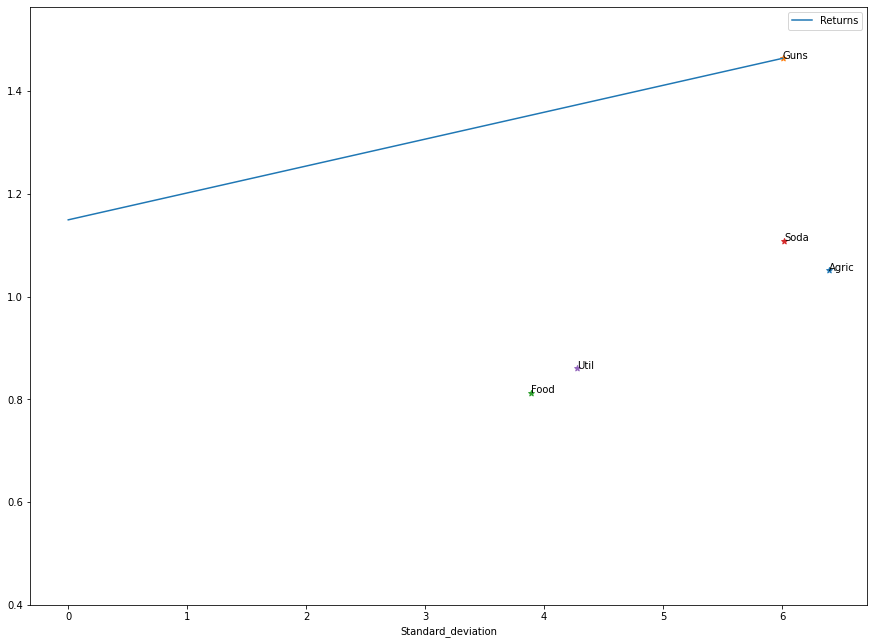

In [332]:
Efficient_frontiere_result_WS = Ptf_target_optimization_W_Rf(E_return, E_cov, Expected_Risk_free, Nbr_PTF, bounds = (0,1)) #bounds (0,1) --> short sale constraints

plt=Efficient_frontiere_result_WS['Efficient_frontiere']['Returns'].plot(kind='line',figsize=(15,11), 
     ylim = [0.4, max(Efficient_frontiere_result_WS['Efficient_frontiere']['Returns'])+0.1])
for i in E_return.index :
    plt.scatter([np.sqrt(E_cov[i][i])],[E_return[i]], marker='*')
    plt.annotate(i,(np.sqrt(E_cov[i][i]),E_return[i]))
    

                 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.plot()


#### Explain how the mean-variance frontier has changed with the constraint:

(To Continue)

### (f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

(To Continue)

### (g) Repeat the same calculations in (a)-(f) adding 5 other industry portfolios to the original list of 5 industry portfolios you chose at the start. Compare the results and discuss the advantages and disadvantages of using 10 portfolios instead of 5.

(To continue)

### (h) The investment policy statement now limits you to invest in up to 3 industry portfolios from theoriginal list of 5 industry portfolios. Repeat the same calculations in (a)-(f) with this additional constraint on the maximum number of assets. Is the optimal combination of assets the same for every target expected return?

(To continue)

## Question 2



### (a) Implement the portfolio resampling approach to demonstrate the effect of estimation uncertainty on the mean-variance frontier and tangent portfolios computed in Question 1.

#### Result presentation : 

#### Determination of the maximum return portfolio (without short sell) :

### (b) Instead of choosing 5 industries randomly as you did in Question 1, find the 5 industries among the 48 industries that maximize the Sharpe ratio with and without short selling constraints. Propose and implement methods to identify industries and their weights.

Look at the excess return per st deviation for combinations of 5 industrie portfolio (To continue)

# À faire : 

- Fonction pour avoir le portefeuille tangente
- Plot frontiere efficiente (Sans RF) + avec assets pour visualiser le portefeuille tangente 
- Créer une fonction a l'aide matplotlib.pyplot afin de faire de beaux graphes
- Répondres aux questions
- On pourrait mettre les returns + volatilité annualisées



Si on a le temps:
- Trouver une méthodologie pour calculer les Returns des assets (Vincent semblait avoir une méthode)
- Trouver une méthodologie pour calculer la matrice de covariance (À voir)